In [15]:
#hanan_omara,id:20398559

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
from six.moves import urllib

for fn_dst in ['exp1.csv', 'exp2.csv']:
    fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/%s' % fn_dst

    if os.path.isfile(fn_dst):
        print('File %s is already downloaded' % fn_dst)
    else:
        print('Downloaded %s' % fn_dst)
        urllib.request.urlretrieve(fn_src, fn_dst)

Downloaded exp1.csv
Downloaded exp2.csv


In [5]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
# TODO 
# df = pd.read_csv(...)
df = pd.read_csv('exp1.csv', header=None,names=names,na_values='?')

In [6]:
# TODO
df.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


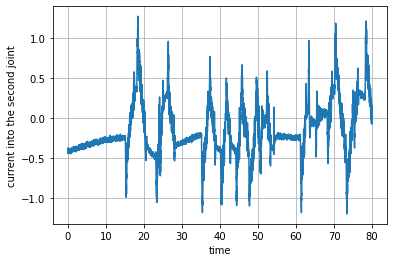

In [7]:
# TODO
# y = ...
y = df['I2'].values
# t = ...
t = df['t'].values
# plt.plot(...)
plt.plot(t,y,'-')
plt.xlabel("time")
plt.ylabel("current into the second joint")
plt.grid(True)

In [8]:
# TODO
# ytrain = ...
ytrain = df['I2']
# Xtrain = ...
xtrain = df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]

In [9]:
from sklearn import linear_model

# Create linear regression object
# TODO
# regr = ...
regr = linear_model.LinearRegression()

In [10]:
# TODO
regr.fit(xtrain,ytrain)

LinearRegression()

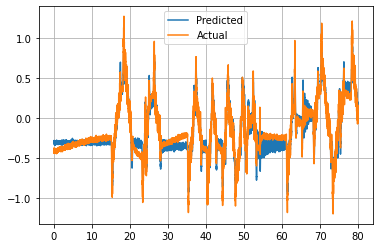

In [11]:
# TODO
# ytrain_pred = ...
ytrain_pred = regr.predict(xtrain)
# plt.plot(...)
plt.plot(t,ytrain_pred)
plt.plot(t,ytrain)
plt.grid(True)
plt.legend(["Predicted","Actual"])
plt.show()

In [12]:
# TODO
# RSS_train = ...
RSS_train = np.mean((ytrain_pred-ytrain)*2)/(np.std(ytrain)*2)
RSS_train

1.0710780539469863e-16

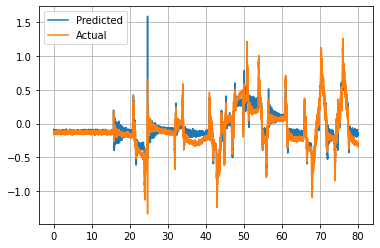

In [13]:
# TODO
df_test = pd.read_csv('exp2.csv', header=None,names=names,na_values='?')
ytest = df_test['I2']
xtest = df_test[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
ytest_pred = regr.predict(xtest)
ytrain_pred = regr.predict(xtest)
plt.plot(t,ytest_pred)
plt.plot(t,ytest)
plt.grid(True)
plt.legend(["Predicted","Actual"])
plt.show()

In [14]:
# TODO
# RSS_test = ...
RSS_test = np.mean((ytest_pred-ytest)*2)/(np.std(ytest)*2)
RSS_test

0.0995733354508628